In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import scale
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.vq import kmeans, vq

In [ ]:
# This CSE711 project is done in google colab
# To load in local compiler change the path to csv:
# df = pd.read_csv(r"marketing_campaign.csv", delimiter='\t',  escapechar='\\')

from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['marketing_campaign.csv']), delimiter='\t',  escapechar='\\')
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
# Checking null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# Checking if missing Income values follow any pattern with other columns
missing = df[df['Income'].isna()]
complete = df[~df['Income'].isna()]

In [ ]:
missing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,24.000000,24.000000,0.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.0,24.000000,24.000000,24.000000,24.0,24.0,24.0,24.0,24.000000
mean,5943.625000,1967.458333,NaN,0.666667,0.583333,58.041667,197.208333,21.333333,162.708333,27.166667,...,5.083333,0.0,0.125000,0.041667,0.083333,0.0,0.0,3.0,11.0,0.041667
std,3028.349268,12.021644,NaN,0.637022,0.583592,29.492046,242.479758,38.310705,339.420411,41.281290,...,2.586195,0.0,0.337832,0.204124,0.282330,0.0,0.0,0.0,0.0,0.204124
min,1295.000000,1943.000000,NaN,0.000000,0.000000,4.000000,5.000000,0.000000,3.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
25%,3063.250000,1957.750000,NaN,0.000000,0.000000,35.500000,22.000000,1.000000,14.500000,2.000000,...,3.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
50%,5526.500000,1969.500000,NaN,1.000000,1.000000,62.000000,76.000000,3.500000,35.000000,8.000000,...,6.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
75%,8597.750000,1974.250000,NaN,1.000000,1.000000,82.250000,286.000000,24.250000,177.000000,40.750000,...,7.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
max,10629.000000,1989.000000,NaN,2.000000,2.000000,96.000000,861.000000,138.000000,1607.000000,164.000000,...,9.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,3.0,11.0,1.000000


In [ ]:
complete.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


From datacamp assignment:

## Missingness Types:
**MCAR**: Missing completely at random (No systematic relationship between missing data and other values) (Data entry errors) \
**MAR**: Misssing at random (Systematic relationship between missing data and other OBSERVED values) (Missing ozone data for high temp) \
**MNAR**: Missing not at random (Systematic relationship between missing data and other UNOBSERVED values) (Missing temp data for high temp, out of scale)

### Above missing income is MCAR.

In [ ]:
# Dropping all null values
cs = df.dropna()
cs.shape

(2216, 29)

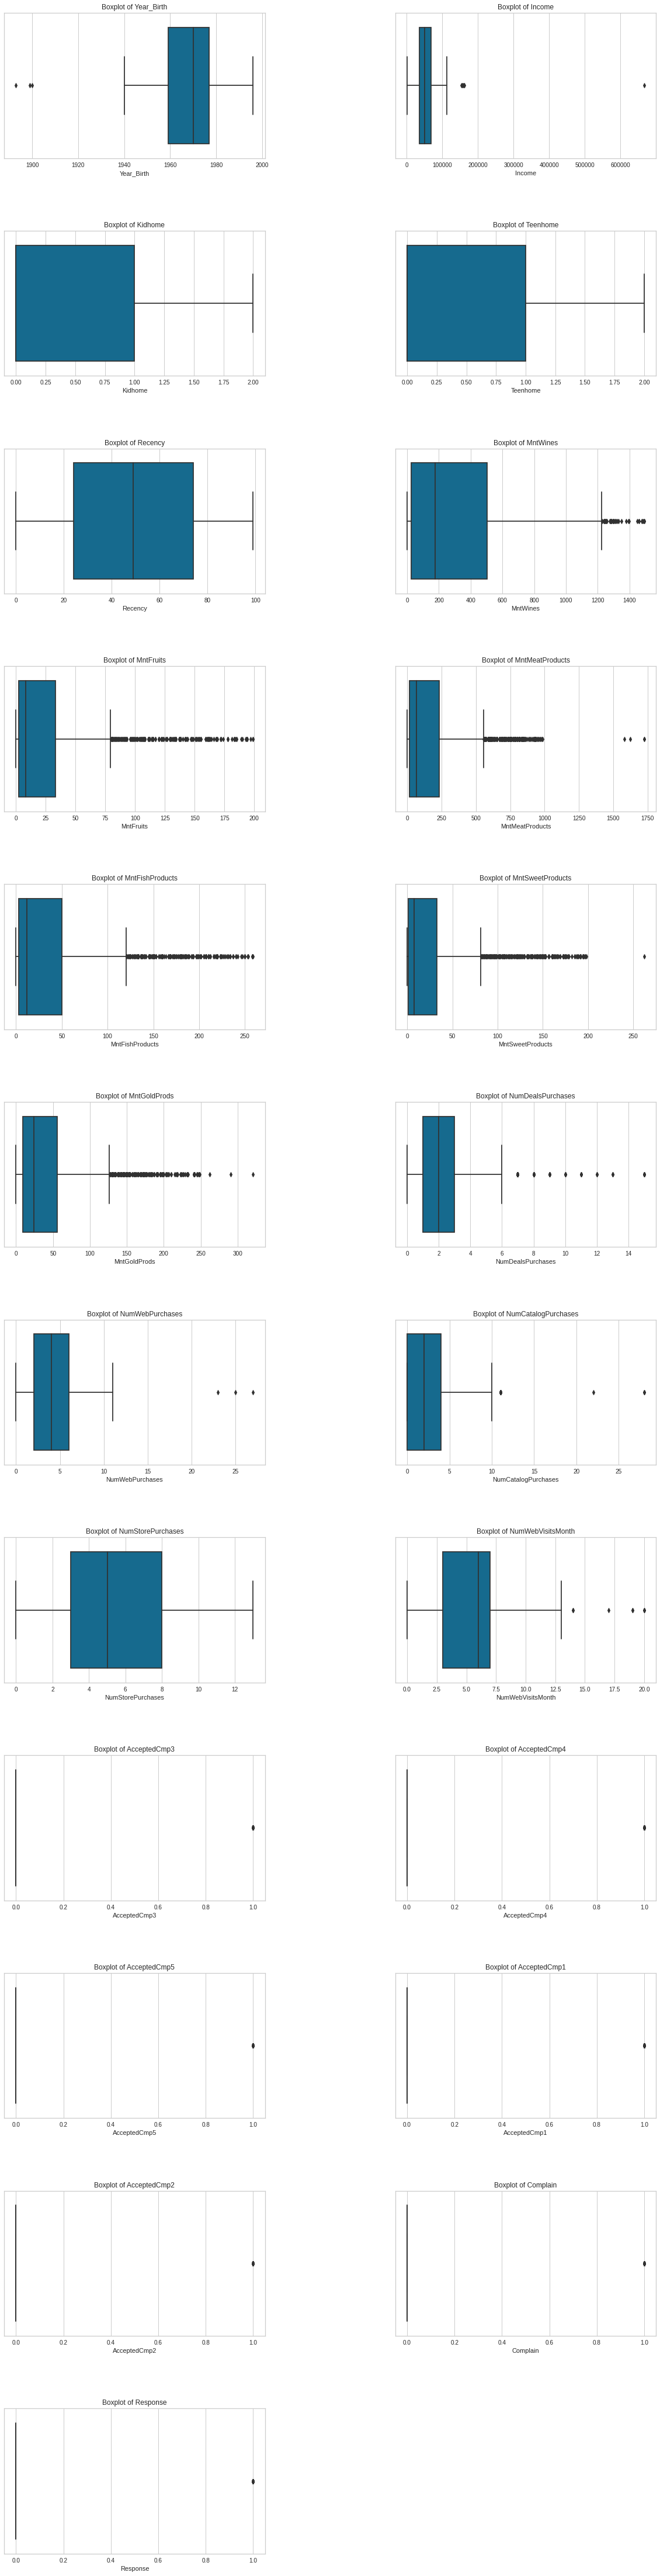

In [ ]:
# Checking Outliers with Boxplots
plt.figure(1, figsize=(20, 80))
n=0
for a in ['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']:
    n += 1
    plt.subplot(12, 2, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.boxplot(x=cs[a])
    plt.title('Boxplot of {}'.format(a))
plt.show()

In [ ]:
# Manually removing all Year_Birth before 1940 derived from boxplot data
cs = cs.loc[df["Year_Birth"] > 1940]

In [ ]:
# Manually removing all Income larger than 125000 derived from boxplot data
cs = cs.loc[df["Income"] < 125000]

In [ ]:
# Checking if the outliers are removed
cs.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,...,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.0,2204.0,2204.000000
mean,5584.950544,1968.917423,51622.313067,0.442377,0.506806,48.987750,306.238203,26.415154,165.383848,37.773593,...,5.337114,0.073956,0.074410,0.073049,0.064428,0.013612,0.009074,3.0,11.0,0.151089
std,3248.202245,11.692244,20717.761860,0.537171,0.544397,28.921346,337.552740,39.789534,217.807804,54.831173,...,2.414072,0.261759,0.262497,0.260276,0.245570,0.115898,0.094848,0.0,0.0,0.358217
min,0.000000,1941.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35191.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5454.500000,1970.000000,51301.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8418.500000,1977.000000,68289.750000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Checking new shape of dataframe
cs.shape

(2204, 29)

In [ ]:
from datetime import datetime

# New 'Age' column by calculating age of customer from Year_Birth
cs.insert(1, "Age", 2022 - cs['Year_Birth'], True)

# New 'Children' column by adding Kidhome and Teenhome
cs.insert(5, "Children", cs['Kidhome'] + cs['Teenhome'], True)

# New 'Customer_Since' column by calculating months duration from Dt_Customer
cs.insert(6, "Customer_Since", ((datetime.today() - cs['Dt_Customer'].astype('datetime64[ns]')) // np.timedelta64(1, 'M')), True)

# New 'TotalSpent' column by adding spent amount on Wines, Fruits, Meat, Fish, Sweet and Gold 
cs.insert(7, "TotalSpent", cs['MntWines']+cs['MntFruits']+cs['MntMeatProducts']+cs['MntFishProducts']+cs['MntSweetProducts']+cs['MntGoldProds'], True)

# New 'TotalPromotions' column by adding all previous accepted promotions
cs.insert(8, "TotalPromotions", cs['AcceptedCmp1']+cs['AcceptedCmp2']+cs['AcceptedCmp3']+cs['AcceptedCmp4']+cs['AcceptedCmp5'], True)

# New 'TotalPurchases' column by adding total transactions on web, catalog and store
cs.insert(9, "TotalPurchases", cs['NumWebPurchases']+cs['NumCatalogPurchases']+cs['NumStorePurchases'], True)

In [ ]:
# Listing all columns
cs.columns

Index(['ID', 'Age', 'Year_Birth', 'Education', 'Marital_Status', 'Children',
       'Customer_Since', 'TotalSpent', 'TotalPromotions', 'TotalPurchases',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Dropping unwanted columns
cs.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1, inplace=True)

In [ ]:
cs['Education'].value_counts()

Graduation    1113
PhD            475
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [ ]:
#splitting Education into graduate and not graduate categories
def education_categories(x):
    if x =='2n Cycle' or  x =='Basic':
        return 'Not Graduate'
    else : 
        return 'Graduate'
cs["Education"] = cs["Education"].apply(lambda x : education_categories(x))

In [ ]:
cs['Education'].value_counts()

Graduate        1952
Not Graduate     252
Name: Education, dtype: int64

In [ ]:
cs['Marital_Status'].value_counts()

Married     854
Together    568
Single      469
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
#splitting Marital_Status into single and not single categories
def marital_status_categories(x):
    if x == "Married" or  x=="Together":
        return 'Not Single'
    else : 
        return 'Single'
cs["Marital_Status"] = cs["Marital_Status"].apply(lambda x : marital_status_categories(x))

In [ ]:
cs['Marital_Status'].value_counts()

Not Single    1422
Single         782
Name: Marital_Status, dtype: int64

In [ ]:
# Checking updated columns
cs.columns

Index(['Age', 'Education', 'Marital_Status', 'Children', 'Customer_Since',
       'TotalSpent', 'TotalPromotions', 'TotalPurchases', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

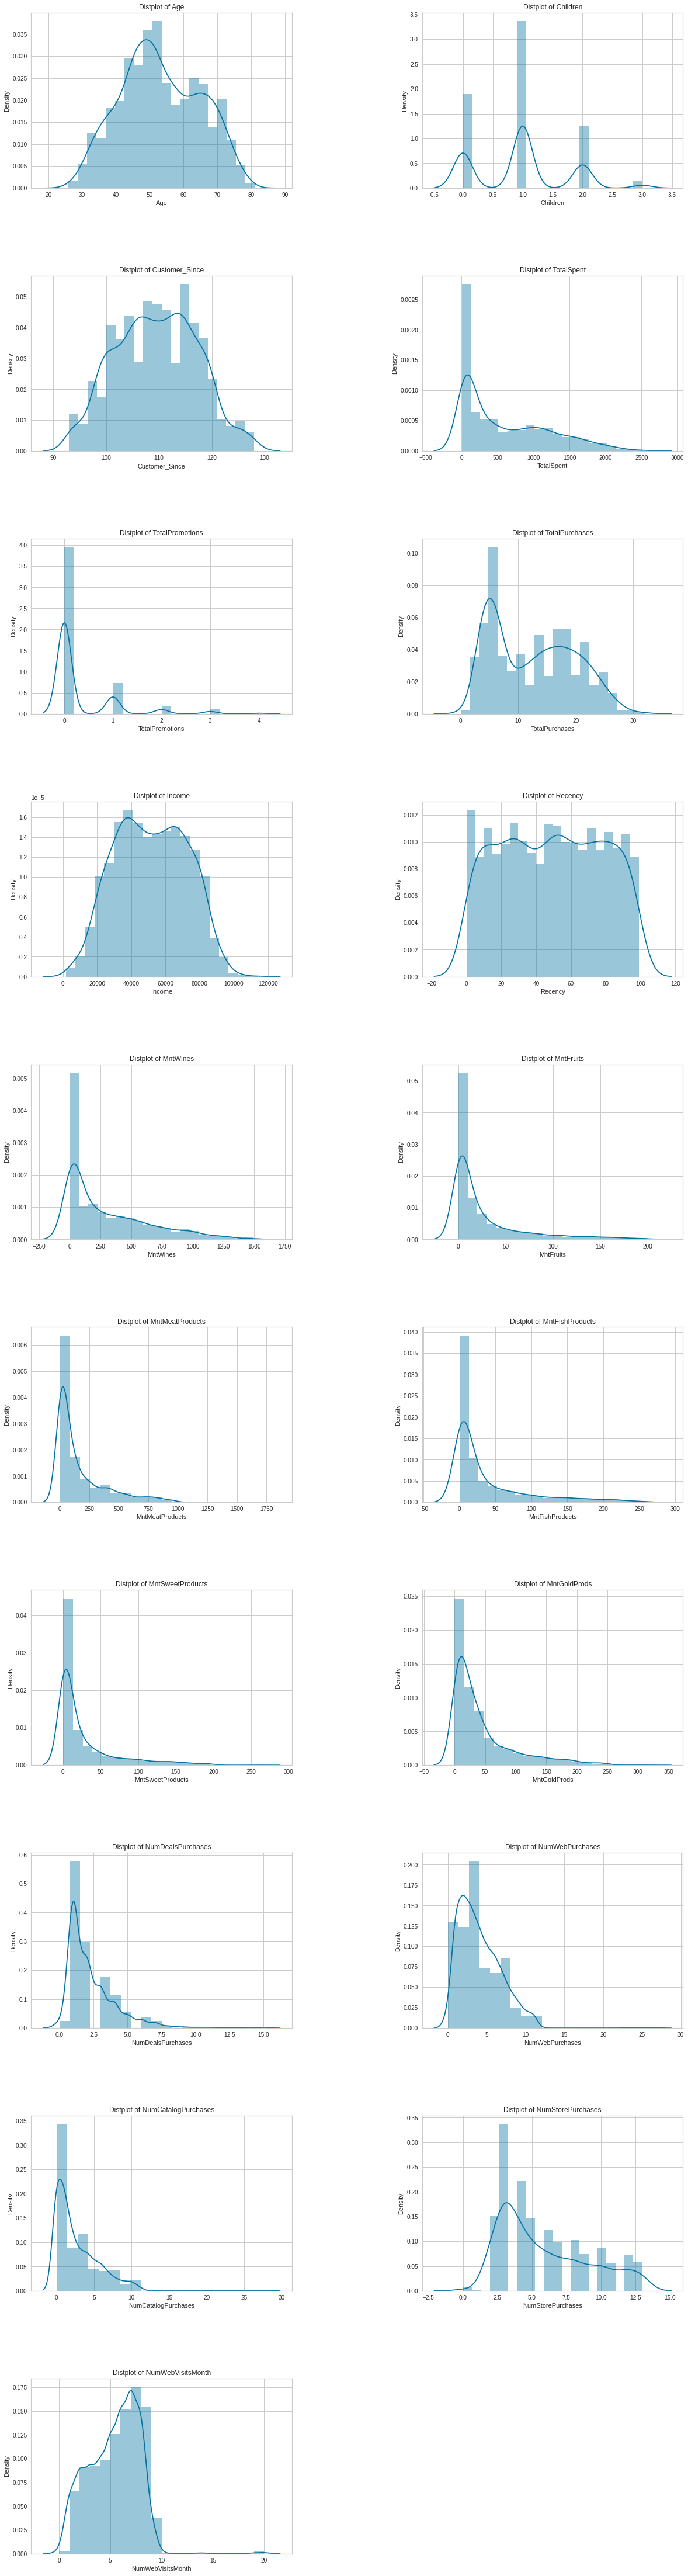

In [ ]:
# Creating distribution plots to visualize the data
plt.figure(1, figsize=(20, 80))
n=0
for x in ['Age', 'Children', 'Customer_Since','TotalSpent', 
       'TotalPromotions', 'TotalPurchases', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']:
    n += 1
    plt.subplot(10, 2, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(cs[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

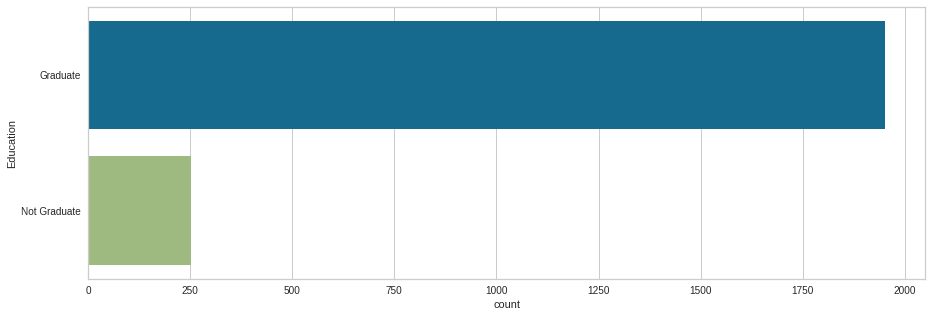

In [ ]:
# Creating count plot to visualize Education data
plt.figure(figsize=(15,5))
sns.countplot(y='Education', data=cs)
plt.show()

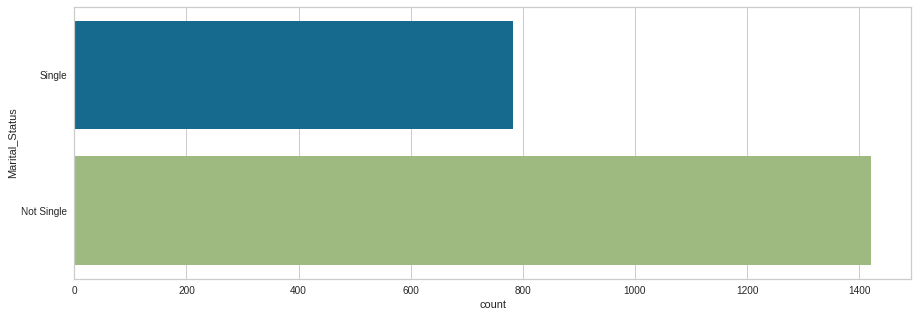

In [ ]:
# Creating count plot to visualize Marital_Status data
plt.figure(figsize=(15,5))
sns.countplot(y='Marital_Status', data=cs)
plt.show()

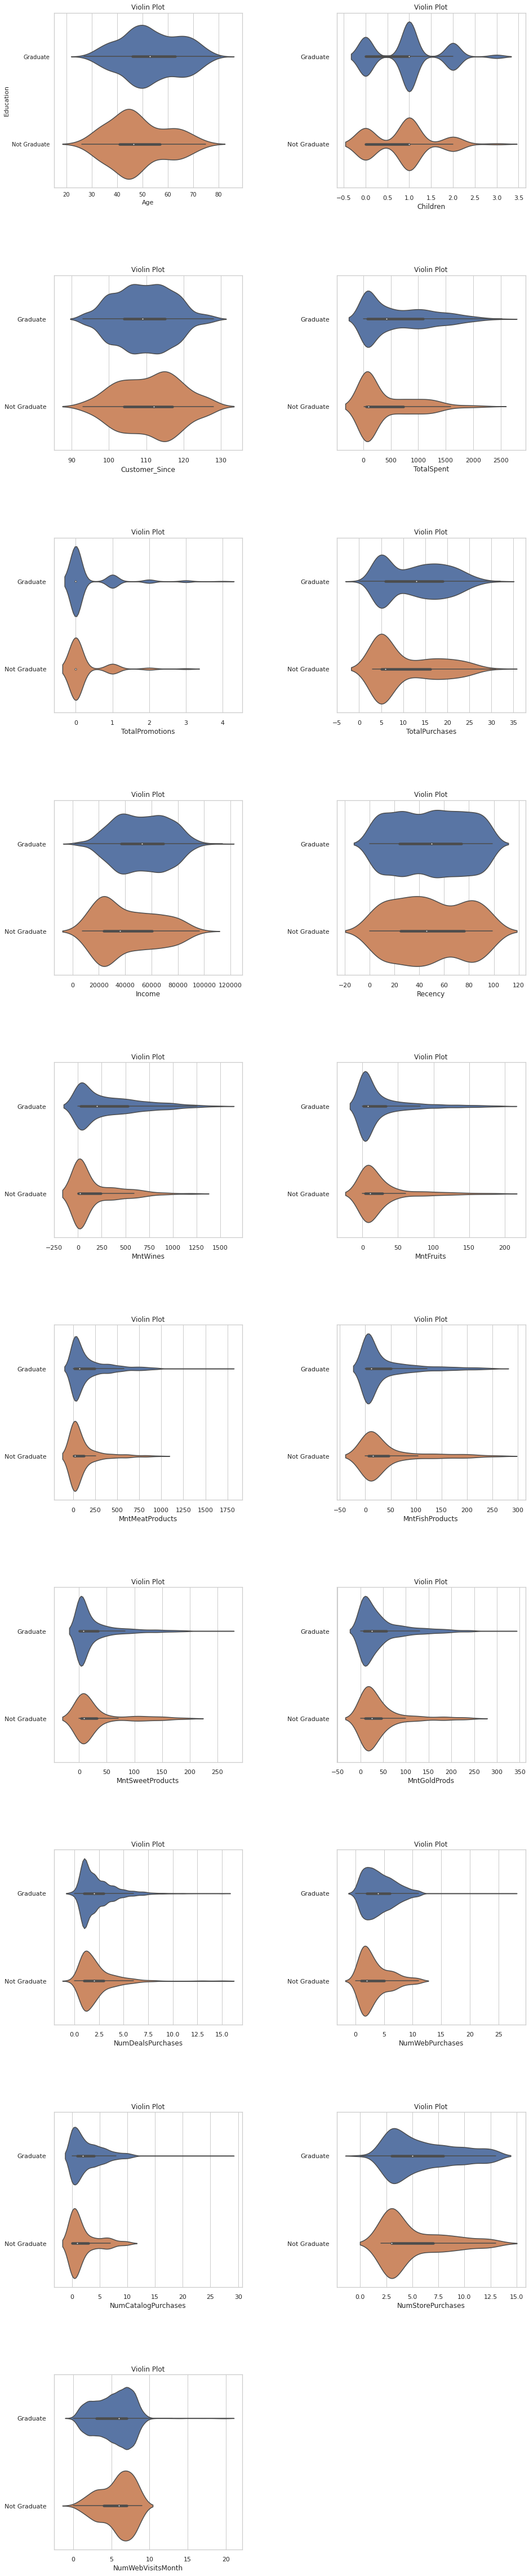

In [ ]:
# Creating violing plots on Education to explore anomalies
plt.figure(1, figsize=(15,100))
n = 0
for cols in ['Age', 'Children', 'Customer_Since','TotalSpent', 
       'TotalPromotions', 'TotalPurchases', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']:
       n += 1
       plt.subplot(12 , 2, n)
       sns.set(style="whitegrid")
       plt.subplots_adjust(hspace=0.5, wspace=0.5)
       sns.violinplot(x = cols, y = 'Education', data = cs)
       plt.ylabel('Education' if n==1 else '')
       plt.title('Violin Plot')
plt.show()

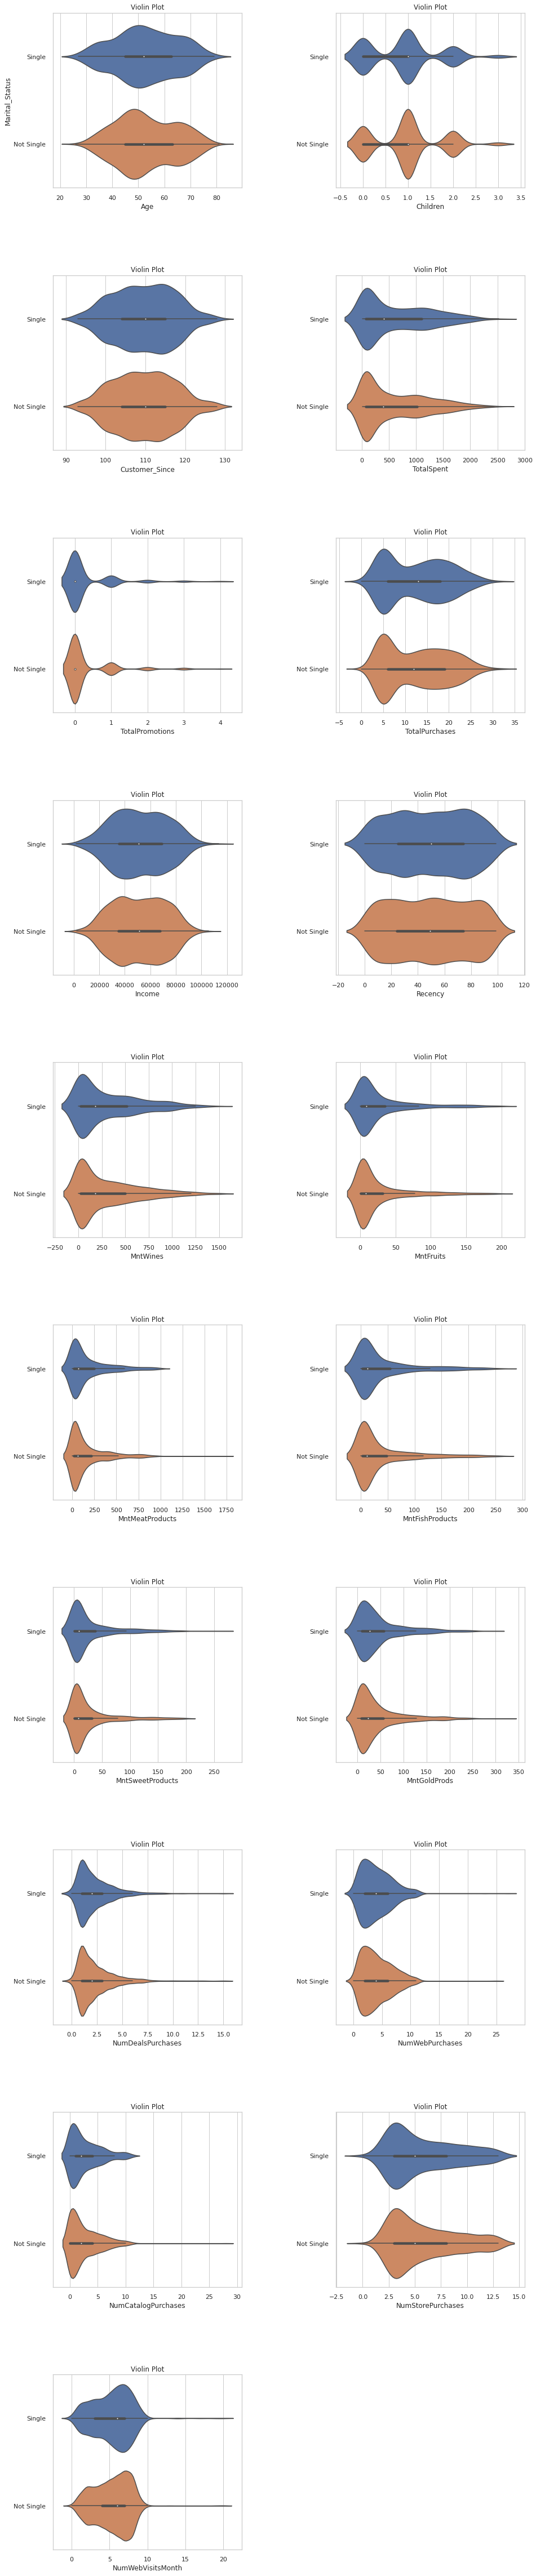

In [ ]:
# Creating violing plots on Marital_Status to explore anomalies
plt.figure(1, figsize=(15,100))
n = 0
for cols in ['Age', 'Children', 'Customer_Since','TotalSpent', 
       'TotalPromotions', 'TotalPurchases', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']:
       n += 1
       plt.subplot(12 , 2, n)
       sns.set(style="whitegrid")
       plt.subplots_adjust(hspace=0.5, wspace=0.5)
       sns.violinplot(x = cols, y = 'Marital_Status', data = cs)
       plt.ylabel('Marital_Status' if n==1 else '')
       plt.title('Violin Plot')
plt.show()

In [ ]:
# Creating age groups
age_26_35 = cs.Age[(cs.Age >= 26) & (cs.Age <= 35)]
age_36_45 = cs.Age[(cs.Age >= 36) & (cs.Age <= 45)]
age_46_55 = cs.Age[(cs.Age >= 46) & (cs.Age <= 55)]
age_56_65 = cs.Age[(cs.Age >= 56) & (cs.Age <= 65)]
age_66_up = cs.Age[(cs.Age >= 66)]

x_age = ['Age 26-35', 'Age 36-45', 'Age 46-55', 'Age 56-65', 'Age 66+']
y_age = [len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_56_65.values), len(age_66_up.values)]

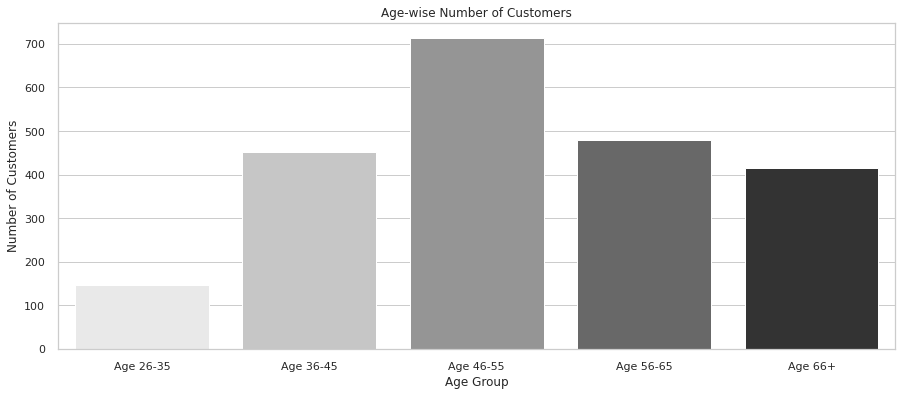

In [ ]:
# Creating bar plots to visualize customer numbers by age groups
plt.figure(figsize=(15,6))
sns.barplot(x=x_age, y=y_age, palette='Greys')
plt.title("Age-wise Number of Customers")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

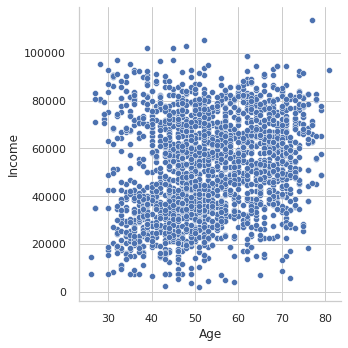

In [ ]:
# Creating realtion plot of Age and Income
sns.relplot(x='Age', y='Income', data = cs)

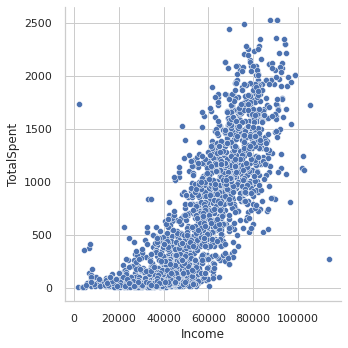

In [ ]:
# Creating realtion plot of Income and TotalSpent
sns.relplot(x='Income', y='TotalSpent', data = cs)

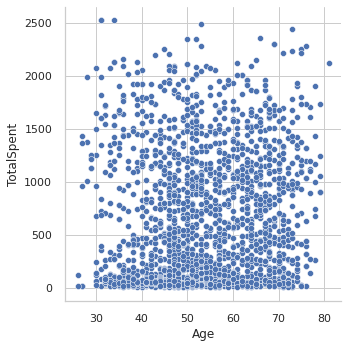

In [ ]:
# Creating realtion plot of Age and TotalSpent
sns.relplot(x='Age', y='TotalSpent', data = cs)

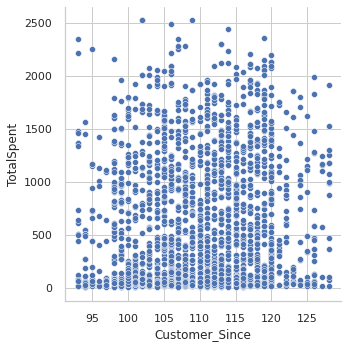

In [ ]:
# Creating realtion plot of Customer_Since and TotalSpent
sns.relplot(x='Customer_Since', y='TotalSpent', data = cs)

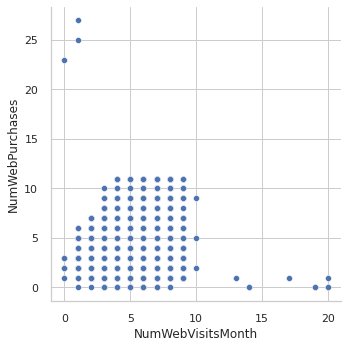

In [ ]:
# Creating realtion plot of NumWebVisitsMonth and NumWebPurchases
sns.relplot(x='NumWebVisitsMonth', y='NumWebPurchases', data = cs)

In [ ]:
# Finding significant correlation among features
matrix = cs.corr()
matrix = matrix.unstack()
matrix[(matrix< -0.5) | (matrix> 0.8) & (matrix<1)]

Children             TotalSpent            -0.501559
                     MntMeatProducts       -0.514296
TotalSpent           Children              -0.501559
                     TotalPurchases         0.822452
                     Income                 0.823866
                     MntWines               0.897260
                     MntMeatProducts        0.856803
                     NumWebVisitsMonth     -0.502050
TotalPurchases       TotalSpent             0.822452
                     NumCatalogPurchases    0.803590
                     NumStorePurchases      0.865456
Income               TotalSpent             0.823866
                     NumWebVisitsMonth     -0.648311
MntWines             TotalSpent             0.897260
MntMeatProducts      Children              -0.514296
                     TotalSpent             0.856803
                     NumWebVisitsMonth     -0.543501
NumCatalogPurchases  TotalPurchases         0.803590
                     NumWebVisitsMonth     -0.

Text(0.5, 1.0, 'Correlation Matrix')

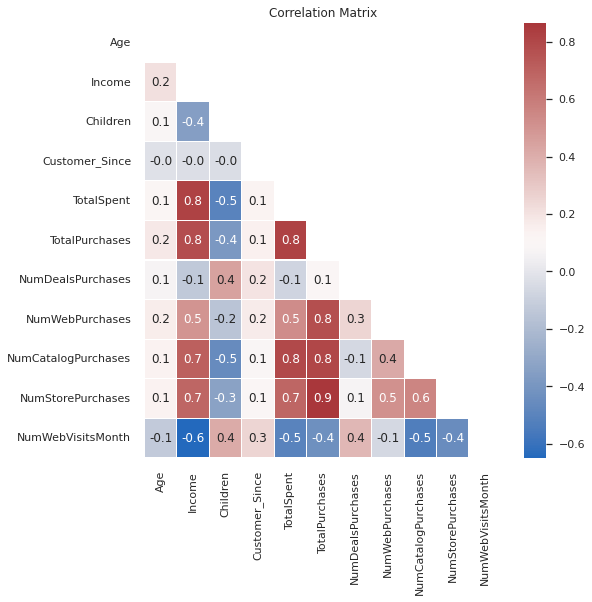

In [ ]:
# Plotting correlation matrix
corr_columns = ['Age', 'Income', 'Children', 'Customer_Since', 'TotalSpent',
       'TotalPurchases', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
mask = np.triu(cs[corr_columns].corr())
plt.figure(figsize=(8, 8))
sns.heatmap(cs[corr_columns].corr(), annot=True, fmt='.1f', linewidths=0.1, cmap='vlag', mask=mask)
plt.title("Correlation Matrix")

In [ ]:
# Taking feature-pair Income and Total Spent to make clusters
ab = cs[['Income', 'TotalSpent']]
ab = ab.dropna(axis=0)

In [ ]:
# Scaling the features
ss = StandardScaler()
scaled = ss.fit_transform(ab)
df = pd.DataFrame(scaled, columns = ['Scaled_Income','Scaled_TotalSpent'])
df.head()

,Scaled_Income,Scaled_TotalSpent
0,0.314569,1.678816
1,-0.254830,-0.964140
2,0.965125,0.280875
3,-1.205824,-0.920922
4,0.322052,-0.307557


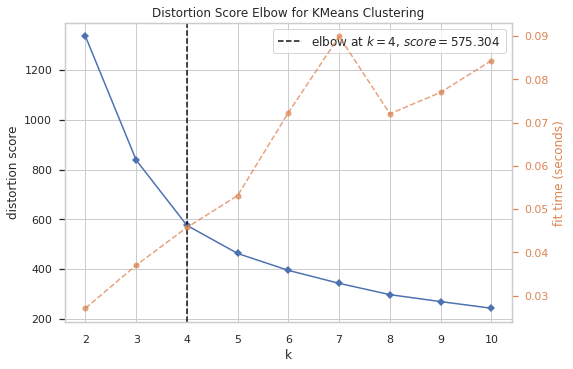

In [ ]:
# Elbow method
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

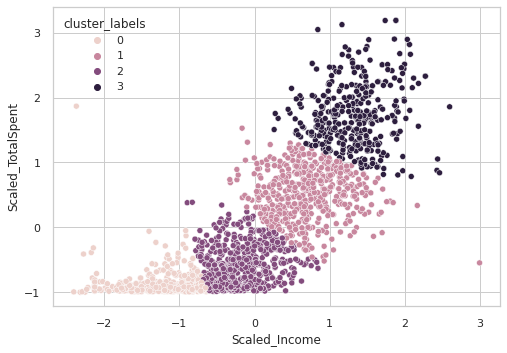

In [ ]:
#Clustering for Income and TotalSpent

cluster_centers, distortion = kmeans(df[['Scaled_Income','Scaled_TotalSpent']], 4) # Generating cluster centers
df['cluster_labels'], distortion_list = vq(df[['Scaled_Income','Scaled_TotalSpent']], cluster_centers) # Assign cluster labels
sns.scatterplot(x='Scaled_Income', y='Scaled_TotalSpent', hue='cluster_labels', data = df) # Plot clusters
plt.show()

In [ ]:
# Observing Cluster features
pd.set_option('display.max_columns', None)
descaled = ss.inverse_transform(df[['Scaled_Income','Scaled_TotalSpent']])
df[['Descaled_Income', 'Descaled_TotalSpent']]=descaled.tolist()
df.groupby(by=['cluster_labels']).describe()

Scaled_Income                                          \
                       count      mean       std       min       25%   
cluster_labels                                                         
0                      636.0 -1.204335  0.382419 -2.408737 -1.430417   
1                      561.0  0.700786  0.421716 -0.329276  0.427348   
2                      631.0 -0.195221  0.340382 -0.896599 -0.463949   
3                      376.0  1.319152  0.407347  0.261366  0.999668   

                                             Scaled_TotalSpent            \
                     50%       75%       max             count      mean   
cluster_labels                                                             
0              -1.145017 -0.885145 -0.643908             636.0 -0.883582   
1               0.669418  0.965125  2.998672             561.0  0.510714   
2              -0.241988  0.027528  0.845683             631.0 -0.582376   
3               1.348868  1.555622  2.599745             376.0  1.709913   

                                                                            \
                     std       min       25%       50%       75%       max   
cluster_labels                                                               
0               0.166243 -1.000710 -0.956245 -0.923416 -0.876042  1.866649   
1               0.381481 -0.548581  0.232670  0.533535  0.806142  1.527553   
2               0.302009 -0.987412 -0.856095 -0.618395 -0.342464  0.385596   
3               0.493347  0.782871  1.353433  1.630611  2.020822  3.188127   

               Descaled_Income                                               \
                         count          mean          std      min      25%   
cluster_labels                                                                
0                        636.0  26676.841195  7921.072771   1730.0  21994.0   
1                        561.0  66137.732620  8735.022411  44802.0  60474.0   
2                        631.0  47578.681458  7050.346588  33051.0  42012.5   
3                        376.0  78945.986702  8437.410630  57036.0  72328.5   

                                            Descaled_TotalSpent               \
                    50%       75%       max               count         mean   
cluster_labels                                                                 
0               27905.5  33288.25   38285.0               636.0    75.463836   
1               65488.0  71613.00  113734.0               561.0   914.270945   
2               46610.0  52192.50   69139.0               631.0   256.668780   
3               79561.5  83844.00  105471.0               376.0  1635.707447   

                                                                      
                       std     min      25%     50%      75%     max  
cluster_labels                                                        
0               100.011465     5.0    31.75    51.5    80.00  1730.0  
1               229.498447   277.0   747.00   928.0  1092.00  1526.0  
2               181.688368    13.0    92.00   235.0   401.00   839.0  
3               296.796747  1078.0  1421.25  1588.0  1822.75  2525.0

In [ ]:
ab = cs[['Age', 'TotalSpent']]
ab = ab.dropna(axis=0)

In [ ]:
ss = StandardScaler()
scaled = ss.fit_transform(ab)
df = pd.DataFrame(scaled, columns = ['Scaled_Age','Scaled_TotalSpent'])
df.head()

,Scaled_Age,Scaled_TotalSpent
0,1.019490,1.678816
1,1.276129,-0.964140
2,0.335121,0.280875
3,-1.290257,-0.920922
4,-1.033618,-0.307557


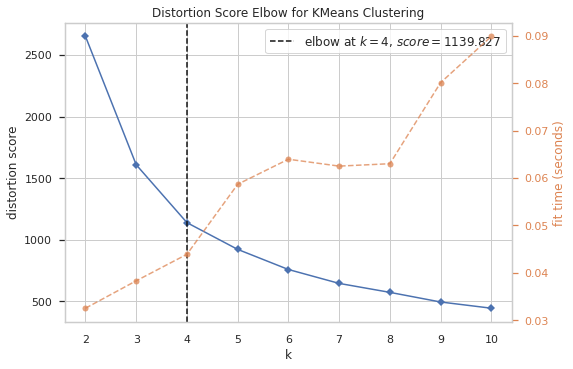

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

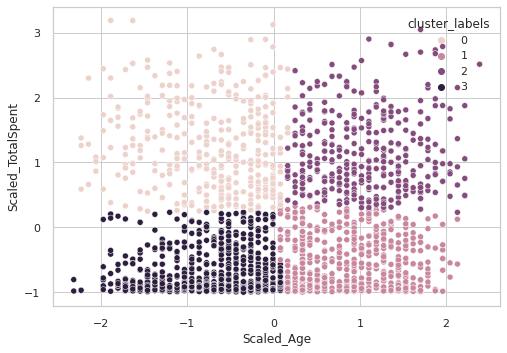

In [ ]:
#Clustering for Age and TotalSpent

cluster_centers, distortion = kmeans(df[['Scaled_Age','Scaled_TotalSpent']], 4) # Generating cluster centers
df['cluster_labels'], distortion_list = vq(df[['Scaled_Age','Scaled_TotalSpent']], cluster_centers) # Assign cluster labels
sns.scatterplot(x='Scaled_Age', y='Scaled_TotalSpent', hue='cluster_labels', data = df) # Plot clusters
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
descaled = ss.inverse_transform(df[['Scaled_Age','Scaled_TotalSpent']])
df[['Descaled_Age', 'Descaled_TotalSpent']]=descaled.tolist()
df.groupby(by=['cluster_labels']).describe()

Scaled_Age                                                    \
                    count      mean       std       min       25%       50%   
cluster_labels                                                                
0                   403.0 -0.724761  0.609189 -2.231265 -1.119165 -0.605888   
1                   561.0  0.905886  0.511768  0.078482  0.420667  0.933944   
2                   381.0  1.064396  0.536520  0.164028  0.591759  1.019490   
3                   859.0 -0.723700  0.534537 -2.316811 -1.119165 -0.605888   

                                   Scaled_TotalSpent                      \
                     75%       max             count      mean       std   
cluster_labels                                                             
0              -0.178157  0.164028             403.0  1.226622  0.671534   
1               1.276129  2.131591             561.0 -0.551473  0.388945   
2               1.447221  2.388229             381.0  1.137088  0.599073   
3              -0.263703  0.078482             859.0 -0.719654  0.318715   

                                                                 Descaled_Age  \
                     min       25%       50%       75%       max        count   
cluster_labels                                                                  
0               0.247630  0.664852  1.092047  1.682141  3.188127        403.0   
1              -0.999047 -0.909287 -0.658289 -0.246054  0.324093        561.0   
2               0.231008  0.654878  0.982339  1.530877  3.046837        381.0   
3              -1.000710 -0.935882 -0.879366 -0.571852  0.239319        859.0   

                                                                   \
                     mean       std   min   25%   50%   75%   max   
cluster_labels                                                      
0               44.610422  7.121168  27.0  40.0  46.0  51.0  55.0   
1               63.672014  5.982363  54.0  58.0  64.0  68.0  78.0   
2               65.524934  6.271702  55.0  60.0  65.0  70.0  81.0   
3               44.622817  6.248524  26.0  40.0  46.0  50.0  54.0   

               Descaled_TotalSpent                                          \
                             count         mean         std    min     25%   
cluster_labels                                                               
0                            403.0  1344.960298  403.993908  756.0  1007.0   
1                            561.0   275.260250  233.989011    6.0    60.0   
2                            381.0  1291.097113  360.401952  746.0  1001.0   
3                            859.0   174.082654  191.738389    5.0    44.0   

                                        
                   50%     75%     max  
cluster_labels                          
0               1264.0  1619.0  2525.0  
1                211.0   459.0   802.0  
2               1198.0  1528.0  2440.0  
3                 78.0   263.0   751.0

In [ ]:
ab = cs[['Customer_Since', 'TotalSpent']]
ab = ab.dropna(axis=0)

In [ ]:
ss = StandardScaler()
scaled = ss.fit_transform(ab)
df = pd.DataFrame(scaled, columns = ['Scaled_Customer_Since','Scaled_TotalSpent'])
df.head()

,Scaled_Customer_Since,Scaled_TotalSpent
0,2.011621,1.678816
1,-1.635406,-0.964140
2,-0.202645,0.280875
3,-1.895908,-0.920922
4,-0.853900,-0.307557


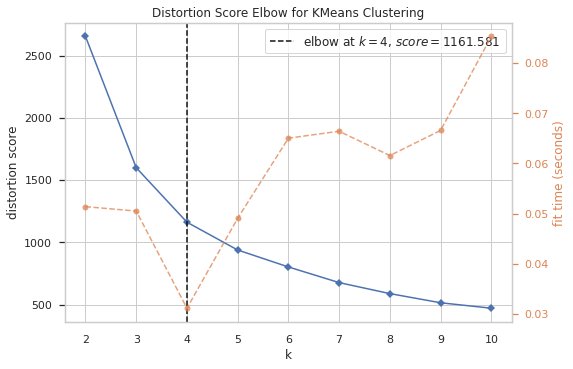

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

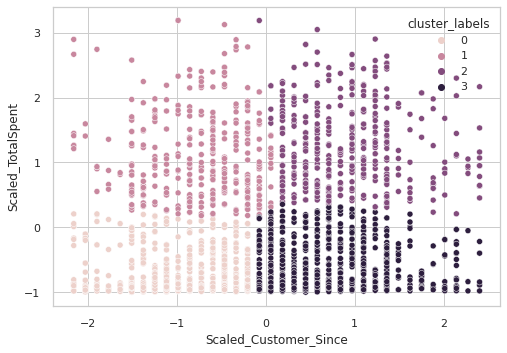

In [ ]:
#Clustering for Customer_Since and TotalSpent

cluster_centers, distortion = kmeans(df[['Scaled_Customer_Since','Scaled_TotalSpent']], 4) # Generating cluster centers
df['cluster_labels'], distortion_list = vq(df[['Scaled_Customer_Since','Scaled_TotalSpent']], cluster_centers) # Assign cluster labels
sns.scatterplot(x='Scaled_Customer_Since', y='Scaled_TotalSpent', hue='cluster_labels', data = df) # Plot clusters
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
descaled = ss.inverse_transform(df[['Scaled_Customer_Since','Scaled_TotalSpent']])
df[['Descaled_Customer_Since', 'Descaled_TotalSpent']]=descaled.tolist()
df.groupby(by=['cluster_labels']).describe()

Scaled_Customer_Since                                          \
                               count      mean       std       min       25%   
cluster_labels                                                                 
0                              671.0 -0.937175  0.530127 -2.156410 -1.244653   
1                              380.0 -0.746615  0.533953 -2.156410 -1.114402   
2                              419.0  0.923606  0.559024 -0.072394  0.448609   
3                              734.0  0.716032  0.574718 -0.072394  0.220670   

                                             Scaled_TotalSpent            \
                     50%       75%       max             count      mean   
cluster_labels                                                             
0              -0.853900 -0.463147 -0.202645             671.0 -0.719338   
1              -0.593398 -0.332896  0.057856             380.0  1.073513   
2               0.839362  1.230115  2.402374             419.0  1.248067   
3               0.578860  1.099864  2.402374             734.0 -0.610625   

                                                                            \
                     std       min       25%       50%       75%       max   
cluster_labels                                                               
0               0.313017 -0.999047 -0.936714 -0.884353 -0.560217  0.206074   
1               0.651668  0.179479  0.550573  0.915018  1.481010  3.188127   
2               0.629889  0.207737  0.709732  1.148563  1.702088  3.186465   
3               0.369510 -1.000710 -0.918844 -0.777970 -0.321270  0.354013   

               Descaled_Customer_Since                                       \
                                 count        mean       std    min     25%   
cluster_labels                                                                
0                                671.0  102.360656  4.070044   93.0  100.00   
1                                380.0  103.823684  4.099420   93.0  101.00   
2                                419.0  116.646778  4.291898  109.0  113.00   
3                                734.0  115.053134  4.412392  109.0  111.25   

                                    Descaled_TotalSpent               \
                  50%    75%    max               count         mean   
cluster_labels                                                         
0               103.0  106.0  108.0               671.0   174.272727   
1               105.0  107.0  110.0               380.0  1252.850000   
2               116.0  119.0  128.0               419.0  1357.861575   
3               114.0  118.0  128.0               734.0   239.674387   

                                                                     
                       std    min      25%     50%      75%     max  
cluster_labels                                                       
0               188.310505    6.0    43.50    75.0   270.00   731.0  
1               392.042566  715.0   938.25  1157.5  1498.00  2525.0  
2               378.940281  732.0  1034.00  1298.0  1631.00  2524.0  
3               222.296648    5.0    54.25   139.0   413.75   820.0

In [ ]:
ab = cs[['NumWebVisitsMonth', 'NumWebPurchases']]
ab = ab.dropna(axis=0)

In [ ]:
ss = StandardScaler()
scaled = ss.fit_transform(ab)
df = pd.DataFrame(scaled, columns = ['Scaled_NumWebVisitsMonth','Scaled_NumWebPurchases'])
df.head()

,Scaled_NumWebVisitsMonth,Scaled_NumWebPurchases
0,0.688986,1.424319
1,-0.139677,-1.132924
2,-0.554009,1.424319
3,0.274655,-0.767604
4,-0.139677,0.328357


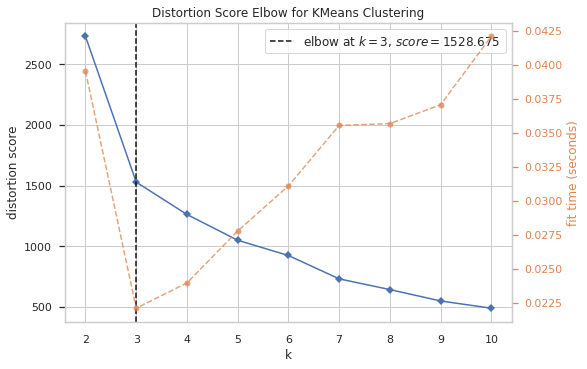

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

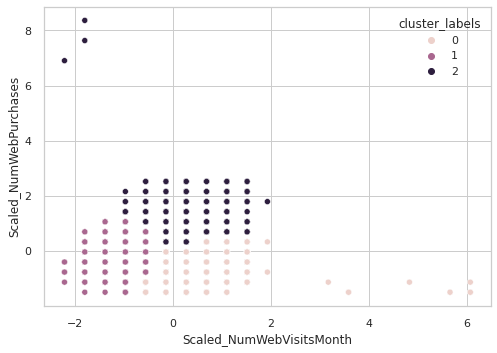

In [ ]:
#Clustering for NumWebVisitsMonth and NumWebPurchases

cluster_centers, distortion = kmeans(df[['Scaled_NumWebVisitsMonth','Scaled_NumWebPurchases']], 3) # Generating cluster centers
df['cluster_labels'], distortion_list = vq(df[['Scaled_NumWebVisitsMonth','Scaled_NumWebPurchases']], cluster_centers) # Assign cluster labels
sns.scatterplot(x='Scaled_NumWebVisitsMonth', y='Scaled_NumWebPurchases', hue='cluster_labels', data = df) # Plot clusters
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
descaled = ss.inverse_transform(df[['Scaled_NumWebVisitsMonth','Scaled_NumWebPurchases']])
df[['Descaled_NumWebVisitsMonth', 'Descaled_NumWebPurchases']]=descaled.tolist()
df.groupby(by=['cluster_labels']).describe()

Scaled_NumWebVisitsMonth                                \
                                  count      mean       std       min   
cluster_labels                                                          
0                                1005.0  0.627558  0.677053 -0.554009   
1                                 657.0 -1.212399  0.431364 -2.211336   
2                                 542.0  0.305997  0.622173 -2.211336   

                                                       Scaled_NumWebPurchases  \
                     25%       50%       75%       max                  count   
cluster_labels                                                                  
0               0.274655  0.688986  1.103318  6.075300                 1005.0   
1              -1.382673 -1.382673 -0.968341 -0.554009                  657.0   
2              -0.139677  0.274655  0.688986  1.931982                  542.0   

                                                                            \
                    mean       std       min       25%       50%       75%   
cluster_labels                                                               
0              -0.693449  0.452534 -1.498245 -1.132924 -0.767604 -0.402283   
1              -0.045304  0.570652 -1.498245 -0.402283 -0.036963  0.328357   
2               1.340740  0.776096  0.328357  0.693678  1.058998  1.789639   

                         Descaled_NumWebVisitsMonth                           \
                     max                      count      mean       std  min   
cluster_labels                                                                 
0               0.328357                     1005.0  6.851741  1.634083  4.0   
1               1.058998                      657.0  2.410959  1.041107  0.0   
2               8.365406                      542.0  6.075646  1.501631  0.0   

                                    Descaled_NumWebPurchases            \
                25%  50%  75%   max                    count      mean   
cluster_labels                                                           
0               6.0  7.0  8.0  20.0                   1005.0  2.202985   
1               2.0  2.0  3.0   4.0                    657.0  3.977169   
2               5.0  6.0  7.0  10.0                    542.0  7.771218   

                                                    
                     std  min  25%  50%  75%   max  
cluster_labels                                      
0               1.238730  0.0  1.0  2.0  3.0   5.0  
1               1.562058  0.0  3.0  4.0  5.0   7.0  
2               2.124425  5.0  6.0  7.0  9.0  27.0

In [ ]:
# Import PCA componenets
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [ ]:
cs.columns

Index(['Age', 'Education', 'Marital_Status', 'Children', 'Customer_Since',
       'TotalSpent', 'TotalPromotions', 'TotalPurchases', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'],
      dtype='object')

In [ ]:
# Scaling for PCA
numerical_cs = cs[['Age', 'Income', 'Children', 'Customer_Since', 'TotalSpent',
       'TotalPurchases', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
scaled_cs = preprocessing.scale(numerical_cs)

In [ ]:
# Performing PCA
pca = PCA(svd_solver='randomized', random_state = 711)
pca.fit(scaled_cs)
pca_data = pca.transform(scaled_cs)

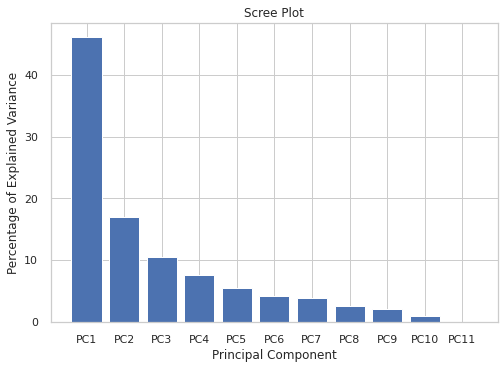

In [ ]:
# Scree Plot of PCA
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Performing PCA
pca = PCA(n_components = 3, svd_solver='randomized', random_state = 711)
pca.fit(scaled_cs)
pca_data = pca.transform(scaled_cs)

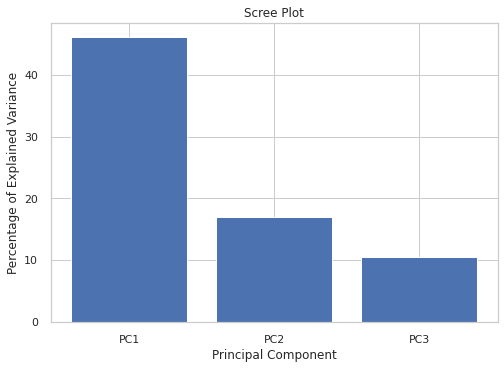

In [ ]:
# Scree Plot of PCA
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
# PCA dataframe labeling
pca_cs = pd.DataFrame(pca_data, columns=labels)
pca_cs.describe()

,PC1,PC2,PC3
count,2.204000e+03,2.204000e+03,2.204000e+03
mean,1.934327e-17,-6.447756e-18,2.417909e-18
std,2.252769e+00,1.362925e+00,1.073826e+00
min,-5.478565e+00,-2.849761e+00,-3.313132e+00
25%,-2.042038e+00,-9.729067e-01,-7.606908e-01
50%,3.229488e-01,-1.970201e-01,2.372298e-02
75%,2.169509e+00,7.951336e-01,7.814947e-01
max,5.674513e+00,6.141719e+00,3.694736e+00


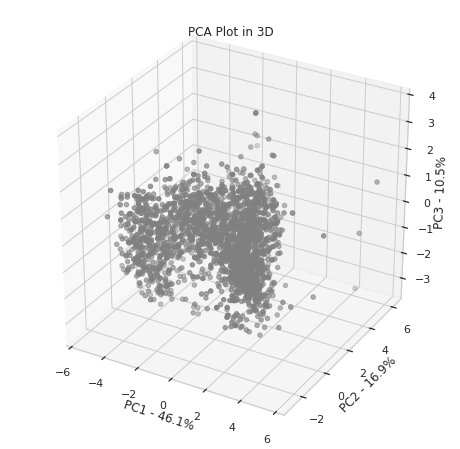

In [ ]:
# Plotting PCA
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")
ax.scatter(pca_cs["PC1"],pca_cs["PC2"],pca_cs["PC3"], c="grey", marker="o")

ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var[2]))

ax.set_title("PCA Plot in 3D")
plt.show()

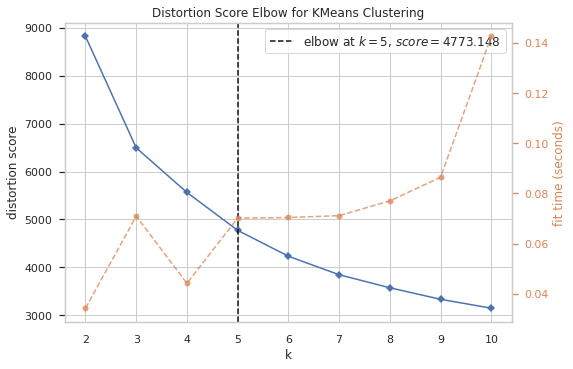

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_cs)
Elbow_M.show()

In [ ]:
# Performing K-Means on PCA
K_Means = KMeans(n_clusters = 5, init = "k-means++", random_state = 711)
Clusters = K_Means.fit_predict(pca_cs)

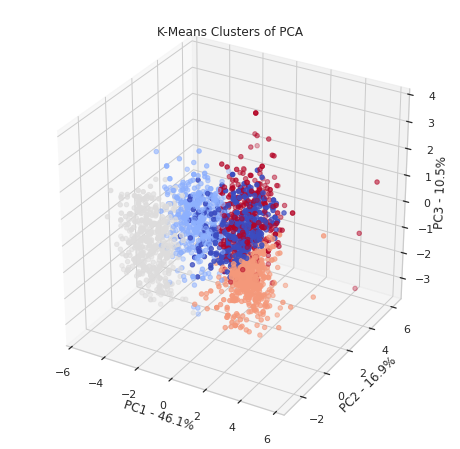

In [ ]:
# Plotting K-means clusters of PCA

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")
ax.scatter(pca_cs["PC1"],pca_cs["PC2"],pca_cs["PC3"], c= Clusters, marker="o", cmap='coolwarm')

ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var[2]))

ax.set_title("K-Means Clusters of PCA")
plt.show()

Text(0.5, 1.0, 'Number of cluster members')

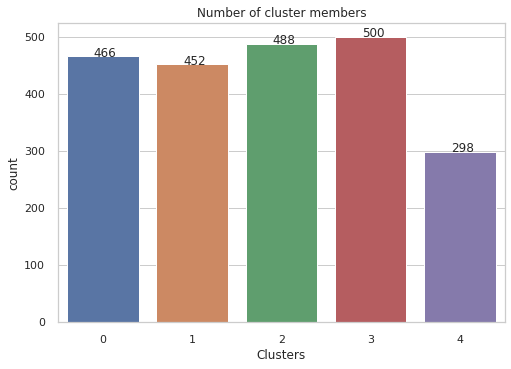

In [ ]:
ax = sns.countplot(x=Clusters)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()))
plt.xlabel('Clusters')
plt.title('Number of cluster members')

In [ ]:
pca_df = cs
pca_df.insert(0, 'Clusters', Clusters)

In [ ]:
pd.set_option('display.max_columns', None)
pca_df.groupby(by=['Clusters']).describe()

Age                                                     Children  \
          count       mean        std   min   25%   50%   75%   max    count   
Clusters                                                                       
0         466.0  56.993562   9.570899  33.0  50.0  57.0  65.0  78.0    466.0   
1         452.0  56.951327  10.087305  30.0  49.0  56.0  66.0  79.0    452.0   
2         488.0  53.362705  13.656748  27.0  42.0  53.0  65.0  81.0    488.0   
3         500.0  44.100000   8.343214  26.0  38.0  44.0  49.0  75.0    500.0   
4         298.0  55.711409  10.181051  31.0  48.0  54.5  65.0  76.0    298.0   

                                                      Customer_Since  \
              mean       std  min  25%  50%  75%  max          count   
Clusters                                                               
0         1.482833  0.709934  0.0  1.0  1.0  2.0  3.0          466.0   
1         0.951327  0.433951  0.0  1.0  1.0  1.0  3.0          452.0   
2         0.100410  0.300854  0.0  0.0  0.0  0.0  1.0          488.0   
3         0.918000  0.536518  0.0  1.0  1.0  1.0  3.0          500.0   
4         1.553691  0.675798  0.0  1.0  2.0  2.0  3.0          298.0   

                                                                 TotalSpent  \
                mean       std   min    25%    50%    75%    max      count   
Clusters                                                                      
0         103.523605  5.568390  93.0  100.0  103.0  107.0  120.0      466.0   
1         112.137168  7.368582  93.0  107.0  113.0  117.0  128.0      452.0   
2         108.221311  7.525739  93.0  103.0  108.0  114.0  128.0      488.0   
3         111.724000  6.521110  95.0  107.0  112.0  116.0  128.0      500.0   
4         113.620805  6.888274  93.0  109.0  114.0  118.0  128.0      298.0   

                                                                            \
                 mean         std    min      25%     50%      75%     max   
Clusters                                                                     
0          107.354077  106.464741    8.0    42.00    66.0   140.00   948.0   
1          984.413717  373.148650  277.0   692.75   933.0  1182.75  2194.0   
2         1373.893443  442.283937  310.0  1046.50  1348.0  1674.50  2525.0   
3           81.832000   78.401821    5.0    33.00    57.0    96.00   467.0   
4          441.365772  242.565588    8.0   282.50   411.0   538.00  1562.0   

         TotalPromotions                                               \
                   count      mean       std  min  25%  50%  75%  max   
Clusters                                                                
0                  466.0  0.081545  0.289238  0.0  0.0  0.0  0.0  2.0   
1                  452.0  0.336283  0.680558  0.0  0.0  0.0  0.0  3.0   
2                  488.0  0.750000  1.038776  0.0  0.0  0.0  1.0  4.0   
3                  500.0  0.094000  0.298902  0.0  0.0  0.0  0.0  2.0   
4                  298.0  0.191275  0.434603  0.0  0.0  0.0  0.0  2.0   

         TotalPurchases                                                    \
                  count       mean       std  min   25%   50%   75%   max   
Clusters                                                                    
0                 466.0   6.197425  2.498101  3.0   4.0   6.0   7.0  15.0   
1                 452.0  19.714602  4.019957  9.0  17.0  20.0  23.0  32.0   
2                 488.0  19.182377  4.095565  9.0  16.0  19.0  22.0  31.0   
3                 500.0   5.358000  2.096336  0.0   4.0   5.0   6.0  14.0   
4                 298.0  12.983221  3.514719  0.0  11.0  13.0  15.0  24.0   

         Income                                                         \
          count          mean           std      min      25%      50%   
Clusters                                                                 
0         466.0  41341.197425  11620.890464   8820.0  33331.5  41335.0   
1         452.0  63487.305310  10503.7